# Udacity CarND Capstone Project - Traffic Light Detection & Classification
# Load Highway Camera Images

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time
import glob

red = glob.glob("data/highway/0-Red/*.*")
yellow = glob.glob("data/highway/1-Yellow/*.*")
green = glob.glob("data/highway/2-Green/*.*")
unknown = glob.glob("data/highway/3-Unknown/*.*")

print(len(red), 'Red traffic light images')
print(len(yellow), 'Yellow traffic light images')
print(len(green), 'Green traffic light images')
print(len(unknown), 'Non-raffic light images')
example_img = mpimg.imread(green[60])
print(example_img.shape, 'image shape')


755 Red traffic light images
110 Yellow traffic light images
357 Green traffic light images
1524 Non-raffic light images
(600, 800, 3) image shape


# Use pre-trained VGG-16 inference to look for Traffic Light

In [2]:
import keras
import numpy as np
from keras.applications import vgg16
#Load the VGG16 model
vgg_model = vgg16.VGG16(weights='imagenet')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


PIL image size =  (224, 224)
NumPy image size =  (224, 224, 3)
Input image size =  (1, 224, 224, 3)
label_vgg16 =  ('n06874185', 'traffic_light', 0.9989497)


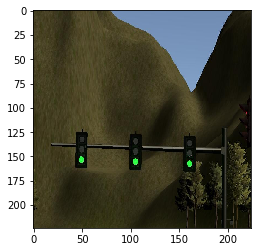

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

%matplotlib inline

# load an image in PIL format
original_image = load_img(green[0], target_size=(224, 224))

# convert the PIL image (width, height) to a NumPy array (height, width, channel)
#image = cv2.resize(example_img, (224, 224))
numpy_image = img_to_array(original_image)

# Convert the image into 4D Tensor (samples, height, width, channels) by adding an extra dimension to the axis 0.
input_image = np.expand_dims(numpy_image, axis=0)

print('PIL image size = ', original_image.size)
print('NumPy image size = ', numpy_image.shape)
print('Input image size = ', input_image.shape)
#plot tensor
plt.imshow(np.uint8(input_image[0]))

#preprocess for vgg16
processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())

# vgg16
predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
label_vgg16 = decode_predictions(predictions_vgg16)
print ('label_vgg16 = ', label_vgg16[0][0])

In [4]:
from random import shuffle

shuffle(red)
shuffle(yellow)
shuffle(green)
shuffle(unknown)



In [5]:
# initialize the data and labels
print("[INFO] loading images for classifer training...")
data = []
labels = []

# loop over the red images
print("[INFO] loading Red images...")
for imagePath in red:
    # load the image, pre-process it, and store it in the data list
    #print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 0 
        #data.append(processed_image_vgg16)
        data.append(image)
        labels.append(label)


print("[INFO] loading Yellow images...")
# loop over the yellow images
for imagePath in yellow:
    # load the image, pre-process it, and store it in the data list
    #print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 1 
        #data.append(processed_image_vgg16)
        data.append(image)
        labels.append(label)

print("[INFO] loading Green images...")
# loop over the green images
for imagePath in green:
    # load the image, pre-process it, and store it in the data list
    #print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 2 
        #data.append(processed_image_vgg16)
        data.append(image)
        labels.append(label)

        

[INFO] loading images for classifer training...
[INFO] loading Red images...
[INFO] loading Yellow images...
[INFO] loading Green images...


In [7]:
import pickle

print ('data loaded', len(data))
print ('labels loaded', len(labels))

# Save the data and labels in pickle file for later use
tl_pickle = {}
tl_pickle["data"] = data
tl_pickle["labels"] = labels
pickle.dump( tl_pickle, open( "highway_traffic_lights.pickle", "wb" ) )

data loaded 1222
labels loaded 1222


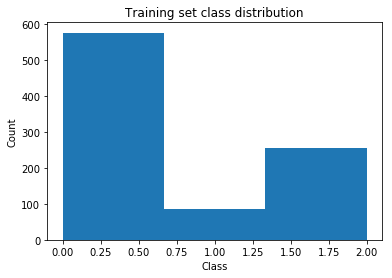

count    916.000000
mean       0.650655
std        0.885962
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        2.000000
dtype: float64
trainX  (916, 224, 224, 3)
trainY  (916, 3)
testX  (306, 224, 224, 3)
testY  (306, 3)


In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pickle

tl_pickle = {}
with open("highway_traffic_lights.pickle", mode='rb') as f:
    tl_pickle = pickle.load(f)

data = tl_pickle["data"]
labels = tl_pickle["labels"]

# convert to array
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float")
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=9876543)

# create Pandas dataframe for analysis of labels
import pandas as pd
trainset=pd.Series(trainY)
n_classes = len(trainset.unique())

# show distribution of training data

#trainset.value_counts().plot.bar()
plt.hist(trainY, n_classes)
plt.title("Training set class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print (trainset.describe())


# convert the labels from integers to one-hot encoding vectors
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

print ('trainX ', trainX.shape)
print ('trainY ', trainY.shape)
print ('testX ', testX.shape)
print ('testY ', testY.shape)
       

# Visualise the training data

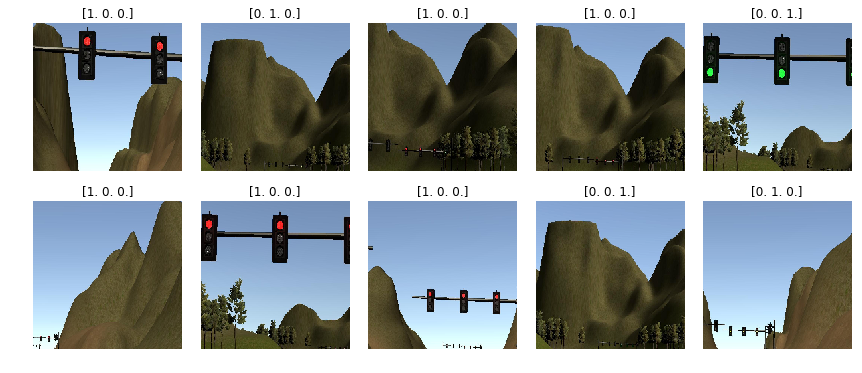

image shape (224, 224, 3)


In [9]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np
from random import randint
import scipy.misc


# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = randint(0, len(trainX-1))
    image = trainX[index]
    axs[i].axis('off')
    rgb = scipy.misc.toimage(image)
    axs[i].imshow(rgb)
    axs[i].set_title(trainY[index])
plt.show()
print ('image shape', image.shape)

# Train Classifier Network

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Lambda, MaxPooling2D, Dropout
from keras import losses, optimizers, regularizers

keep_prob = 0.2

model = Sequential()

model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(224, 224, 3)))

model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(keep_prob))

model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(keep_prob))

model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(3, activation='softmax'))


In [13]:
EPOCHS=20
INIT_LR = 1e-3
BS = 64
opt = optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Hist=model.fit(trainX, trainY, validation_data = (testX, testY), epochs=EPOCHS)
Hist=model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=True, validation_split=0.1, shuffle=True)

Train on 824 samples, validate on 92 samples
Epoch 1/20
824/824 [==============================] - 2s 3ms/step - loss: 0.8669 - acc: 0.6032 - val_loss: 0.8204 - val_acc: 0.6304
Epoch 2/20
824/824 [==============================] - 1s 2ms/step - loss: 0.7272 - acc: 0.6711 - val_loss: 0.7176 - val_acc: 0.6957
Epoch 3/20
824/824 [==============================] - 2s 2ms/step - loss: 0.5203 - acc: 0.7779 - val_loss: 0.5358 - val_acc: 0.7283
Epoch 4/20
824/824 [==============================] - 2s 2ms/step - loss: 0.3823 - acc: 0.8362 - val_loss: 0.4388 - val_acc: 0.8587
Epoch 5/20
824/824 [==============================] - 1s 2ms/step - loss: 0.3197 - acc: 0.8762 - val_loss: 0.4754 - val_acc: 0.8152
Epoch 6/20
824/824 [==============================] - 1s 2ms/step - loss: 0.2488 - acc: 0.9175 - val_loss: 0.2416 - val_acc: 0.8804
Epoch 7/20
824/824 [==============================] - 1s 2ms/step - loss: 0.1834 - acc: 0.9284 - val_loss: 0.2588 - val_acc: 0.9022
Epoch 8/20
824/824 [===========

# Graph Training Results

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


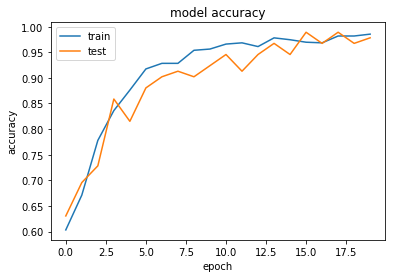

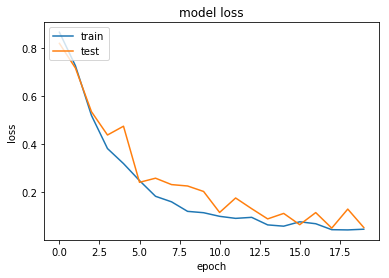

In [14]:
# list all data in history
print(Hist.history.keys())

# summarize history for accuracy
plt.plot(Hist.history['acc'])
plt.plot(Hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(Hist.history['loss'])
plt.plot(Hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('highway_modelv2-ep20.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 111, 111, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 36)        28836     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 36)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 36)        0         
__________

# load saved model

In [19]:
from keras.models import load_model
model = load_model('highway_modelv2-ep20.h5') 
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(testX, testY, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))



Loaded model from disk
acc: 97.71%


Light Classification [[1.0167265e-02 2.4940478e-04 9.8958337e-01]]


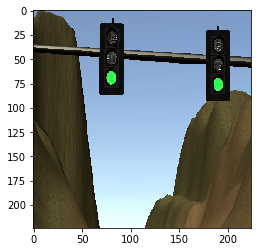

In [41]:
# classify image
img = 159

plt.imshow(np.uint8(testX[img]))
# make a prediction
#classX = model.predict_classes(testX)
classX = model.predict(np.expand_dims(testX[img], axis=0))

# show the inputs and predicted outputs
print('Light Classification', classX)